In [1]:
# google colab configurations 
# these might change
DATA_GENERATION = '13kwW8C01etWsqTYoE2eeFlD4Ft9YVhrw'
DATA_GENERATION_FILE = 'datageneration.py'

HELPERS = '1zskLM0-ZtEQYVI7zvd2ePqtkTOkJmVIL'
HELPERS_FILE = 'helpers.py'

EXPERIMENT = '1OrYHcTvUXHOrg-86_6oWaN2muDpuzn9a'
EXPERIMENT_FILE = 'experiment.py'

NETWORK = '1iFbCIY8IMaqO4I8mu2J7ie7UDJsLGtRv'
NETWORK_FILE = 'networks.py'

CONFIG = '14OF6o1luI8u10Nq96FLBP1M1k-VvQKq-'
CONFIG_FILE ='config.json'


google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    datageneration = drive.CreateFile({'id':DATA_GENERATION})
    datageneration.GetContentFile(DATA_GENERATION_FILE)
    

    helpers = drive.CreateFile({'id':HELPERS})
    helpers.GetContentFile(HELPERS_FILE)

    network = drive.CreateFile({'id':NETWORK})
    network.GetContentFile(NETWORK_FILE)

    experiment = drive.CreateFile({'id':EXPERIMENT})
    experiment.GetContentFile(EXPERIMENT_FILE)

    json = drive.CreateFile({'id':CONFIG})
    json.GetContentFile(CONFIG_FILE)


Running on Colab?
yes


In [0]:
# custom imports
from experiment import Experiment
from datageneration import DataGenerator
from helpers import Helper
# torch imports
from torch.utils import data
import torch

# import utils
import json
from datetime import date
import os

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

with open('config.json') as f:
    file = f.read()
    conf = json.loads(file)

In [4]:
# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    conf['default']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')

Training on GPU!


## Generating a dataset

In [0]:
datagenerator = DataGenerator(**conf[MODEL_PARAMS]['data_gen_params'])
x_values, func_x = datagenerator.generate_curves()
func_x = Helper.list_np_to_sensor(func_x)
x_values = x_values.repeat(func_x.shape[0], 1, 1)

In [0]:
train_len = int(x_values.shape[0] * conf[MODEL_PARAMS]['train_share'])
traindata = data.TensorDataset(x_values[:train_len], func_x[:train_len])
trainloader = data.DataLoader(traindata, batch_size=100)
validata = data.TensorDataset(x_values[train_len:], func_x[train_len:])
valiloader = data.DataLoader(validata, batch_size=1)

In [0]:
# creating an instance of to orchestrate the training
trainer = Experiment(**conf[MODEL_PARAMS]['experiment_params'])

  0%|          | 0/200000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 1.583245038986206
 Validation loss after 0 equals 1.3875267446041106


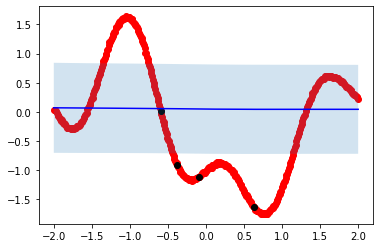

  2%|▏         | 4987/200000 [00:32<20:07, 161.44it/s]

Mean loss at epoch 5000 : 0.8077391982078552
 Validation loss after 5000 equals 1.0614839971065522


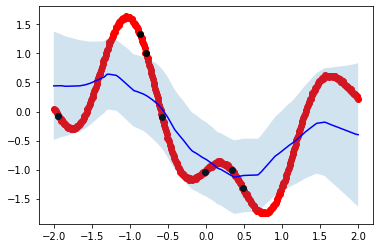

  5%|▍         | 9993/200000 [01:04<19:13, 164.77it/s]

Mean loss at epoch 10000 : 0.575325608253479
 Validation loss after 10000 equals 1.0360302090644837


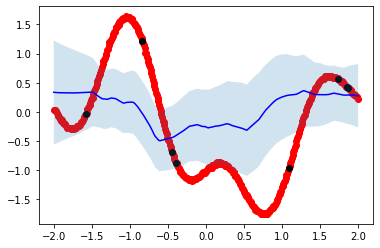

  7%|▋         | 14995/200000 [01:36<19:09, 160.88it/s]

Mean loss at epoch 15000 : 0.24071668088436127
 Validation loss after 15000 equals 0.8640692085027695


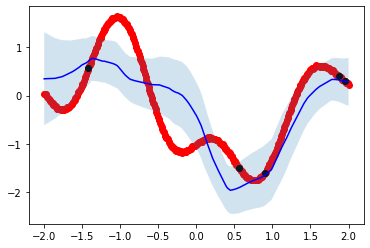

 10%|▉         | 19991/200000 [02:07<18:51, 159.12it/s]

Mean loss at epoch 20000 : 0.657576322555542
 Validation loss after 20000 equals 0.9729067057371139


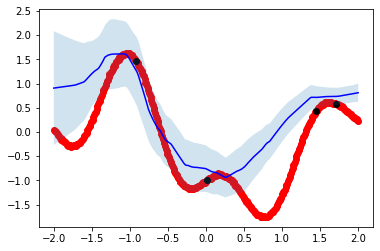

 12%|█▏        | 24985/200000 [02:39<19:19, 150.92it/s]

Mean loss at epoch 25000 : 0.3825714588165283
 Validation loss after 25000 equals 1.401520127058029


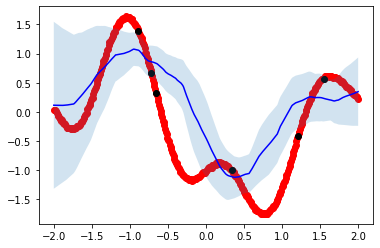

 15%|█▍        | 29992/200000 [03:11<17:32, 161.59it/s]

Mean loss at epoch 30000 : 0.3039368987083435
 Validation loss after 30000 equals 1.0968836396932602


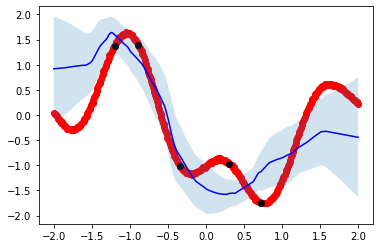

 17%|█▋        | 34996/200000 [03:42<16:53, 162.75it/s]

Mean loss at epoch 35000 : 0.19522225856781006
 Validation loss after 35000 equals 1.1479417905211449


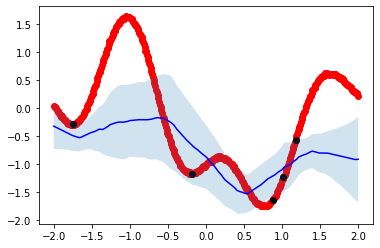

 20%|█▉        | 39990/200000 [04:13<16:44, 159.31it/s]

Mean loss at epoch 40000 : 0.646672248840332
 Validation loss after 40000 equals 0.8573114603757859


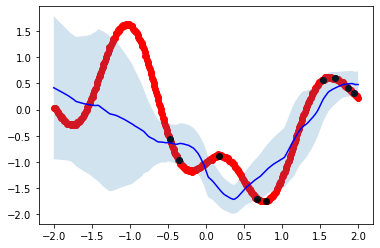

 22%|██▏       | 44999/200000 [04:45<15:58, 161.64it/s]

Mean loss at epoch 45000 : 0.5486553907394409
 Validation loss after 45000 equals 0.7225102722644806


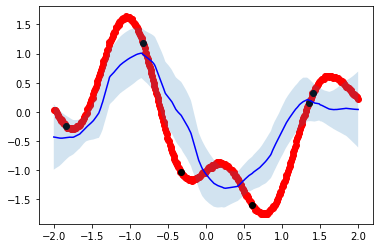

 25%|██▍       | 49999/200000 [05:16<15:25, 162.02it/s]

Mean loss at epoch 50000 : 0.07833456993103027
 Validation loss after 50000 equals 1.1525777667760848


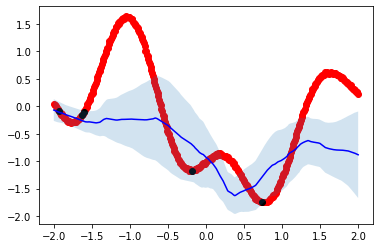

 27%|██▋       | 54986/200000 [05:48<15:10, 159.19it/s]

Mean loss at epoch 55000 : 0.35884416103363037
 Validation loss after 55000 equals 0.9657355308532715


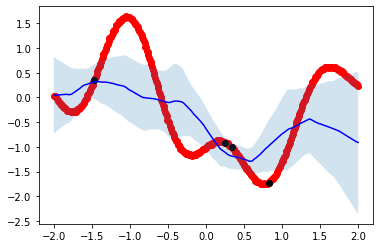

 30%|██▉       | 59993/200000 [06:19<14:25, 161.77it/s]

Mean loss at epoch 60000 : 0.15485353767871857
 Validation loss after 60000 equals 0.9871027827262878


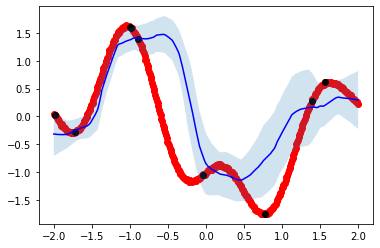

 32%|███▏      | 64995/200000 [06:51<13:49, 162.68it/s]

Mean loss at epoch 65000 : 0.29072389006614685
 Validation loss after 65000 equals 1.9672266721725464


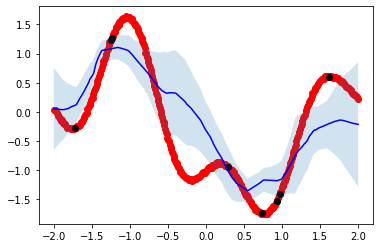

 35%|███▍      | 69985/200000 [07:22<13:40, 158.36it/s]

Mean loss at epoch 70000 : 0.21166175603866577
 Validation loss after 70000 equals 1.0332322627305985


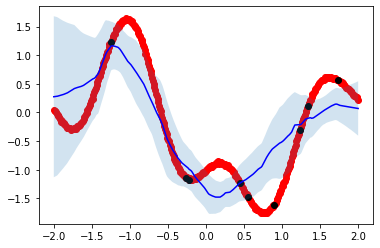

 37%|███▋      | 74988/200000 [07:53<13:02, 159.84it/s]

Mean loss at epoch 75000 : 0.3067202866077423
 Validation loss after 75000 equals 1.1385028332471847


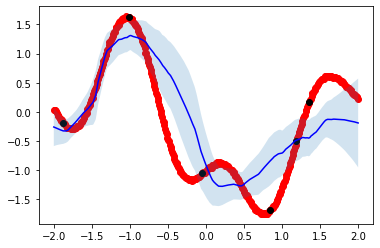

 40%|███▉      | 79992/200000 [08:25<12:26, 160.80it/s]

Mean loss at epoch 80000 : 0.09184453636407852
 Validation loss after 80000 equals 1.09271582365036


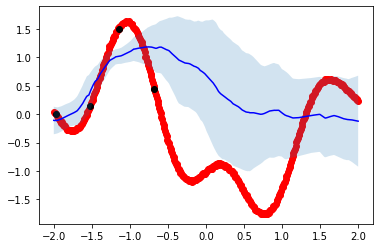

 42%|████▏     | 84996/200000 [08:56<12:12, 156.99it/s]

Mean loss at epoch 85000 : 0.5992064476013184
 Validation loss after 85000 equals 0.9432602763175965


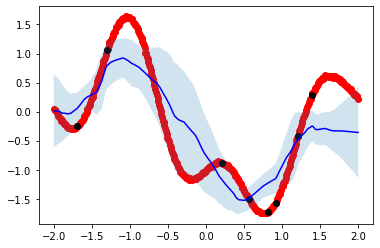

 45%|████▍     | 89992/200000 [09:28<11:17, 162.40it/s]

Mean loss at epoch 90000 : 0.3000839054584503
 Validation loss after 90000 equals 1.0552734225988387


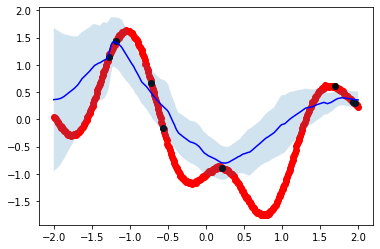

 47%|████▋     | 94986/200000 [10:00<11:14, 155.71it/s]

Mean loss at epoch 95000 : 0.47390615940093994
 Validation loss after 95000 equals 0.899281108379364


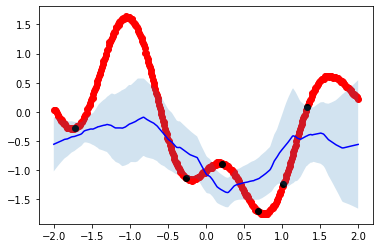

 50%|████▉     | 99991/200000 [10:33<10:38, 156.72it/s]

Mean loss at epoch 100000 : -0.012333905324339867
 Validation loss after 100000 equals 2.030446004867554


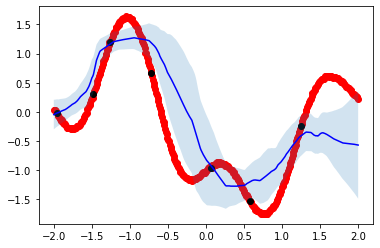

 52%|█████▏    | 104994/200000 [11:05<10:15, 154.26it/s]

Mean loss at epoch 105000 : 0.7025862336158752
 Validation loss after 105000 equals 1.229307022690773


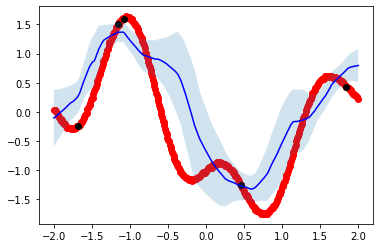

 55%|█████▍    | 109985/200000 [11:37<09:33, 157.05it/s]

Mean loss at epoch 110000 : 0.44596540927886963
 Validation loss after 110000 equals 0.8689619958400726


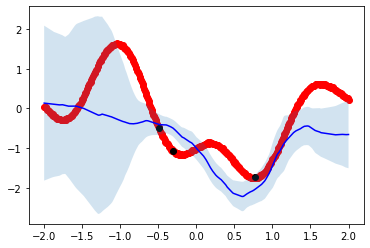

 57%|█████▋    | 114995/200000 [12:09<09:04, 156.04it/s]

Mean loss at epoch 115000 : 0.1751307249069214
 Validation loss after 115000 equals 0.8167018711566925


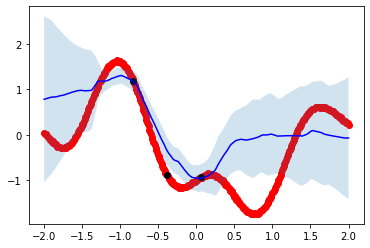

 60%|█████▉    | 119997/200000 [12:42<08:31, 156.26it/s]

Mean loss at epoch 120000 : 0.3866635859012604
 Validation loss after 120000 equals 1.132059210538864


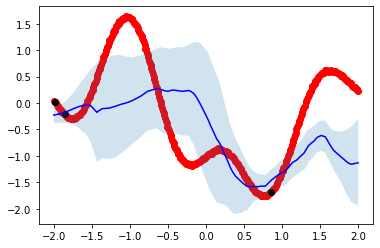

 62%|██████▎   | 125000/200000 [13:14<08:06, 154.27it/s]

Mean loss at epoch 125000 : 0.4077821373939514
 Validation loss after 125000 equals 0.8530956417322159


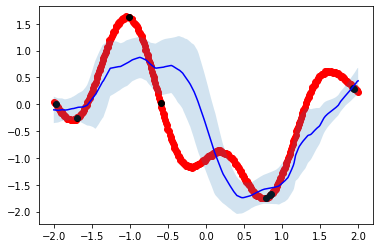

 65%|██████▍   | 129996/200000 [13:47<07:39, 152.35it/s]

Mean loss at epoch 130000 : 0.10831180214881897
 Validation loss after 130000 equals 0.9818846762180329


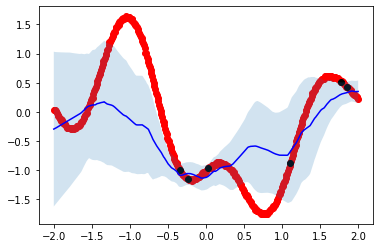

 67%|██████▋   | 134988/200000 [14:19<06:50, 158.21it/s]

Mean loss at epoch 135000 : 0.18624770641326904
 Validation loss after 135000 equals 2.6463953077793123


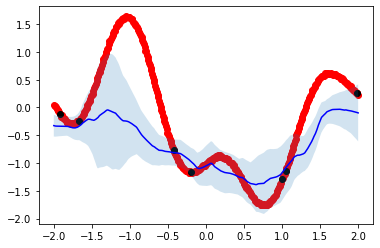

 70%|██████▉   | 139985/200000 [14:51<06:31, 153.26it/s]

Mean loss at epoch 140000 : 0.04044847562909126
 Validation loss after 140000 equals 1.1759939581155776


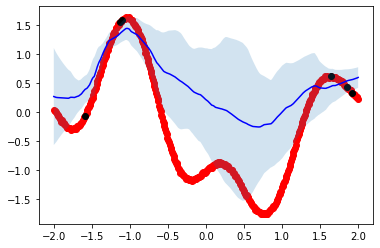

 72%|███████▎  | 145000/200000 [15:24<06:07, 149.63it/s]

Mean loss at epoch 145000 : 0.18996717035770416
 Validation loss after 145000 equals 1.2695594504475594


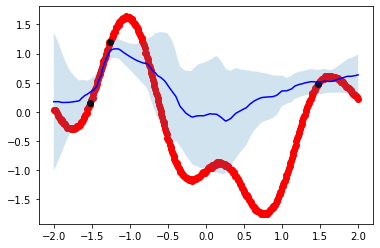

 75%|███████▍  | 149998/200000 [15:56<05:29, 151.61it/s]

Mean loss at epoch 150000 : 0.4786874055862427
 Validation loss after 150000 equals 1.1663691580295563


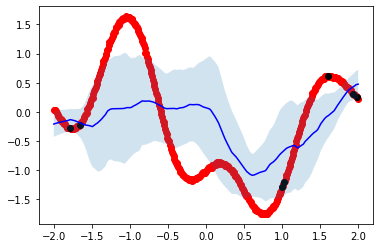

 78%|███████▊  | 155000/200000 [16:28<04:53, 153.24it/s]

Mean loss at epoch 155000 : 0.21934087574481964
 Validation loss after 155000 equals 1.5870131373405456


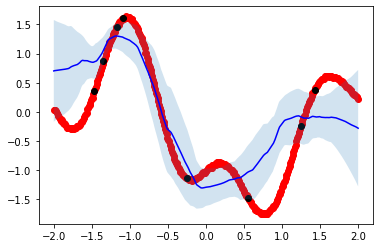

 80%|███████▉  | 159989/200000 [17:01<04:14, 157.32it/s]

Mean loss at epoch 160000 : -0.07448829710483551
 Validation loss after 160000 equals 1.0345189899206162


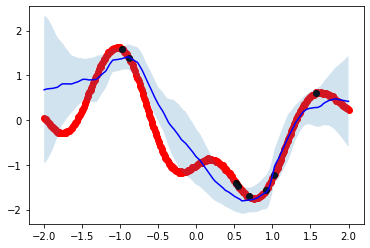

 82%|████████▏ | 164994/200000 [17:33<03:44, 155.75it/s]

Mean loss at epoch 165000 : 0.08928703516721725
 Validation loss after 165000 equals 1.003623178601265


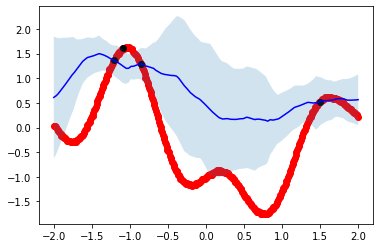

 85%|████████▍ | 169993/200000 [18:06<03:06, 160.70it/s]

Mean loss at epoch 170000 : 0.31003791093826294
 Validation loss after 170000 equals 1.109794381260872


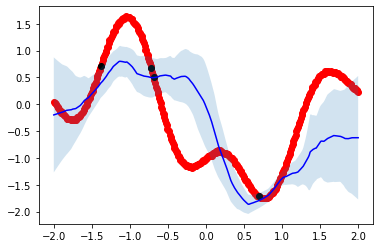

 87%|████████▋ | 174993/200000 [18:38<02:40, 156.17it/s]

Mean loss at epoch 175000 : -0.0045976401306688786
 Validation loss after 175000 equals 1.0193106561899186


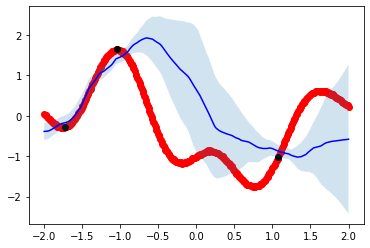

 90%|████████▉ | 179998/200000 [19:10<02:07, 157.30it/s]

Mean loss at epoch 180000 : 0.2315904200077057
 Validation loss after 180000 equals 2.175591599941254


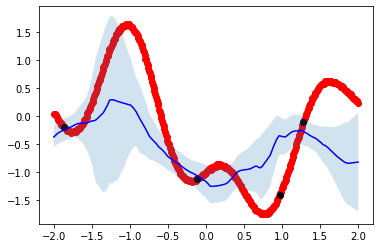

 92%|█████████▏| 184991/200000 [19:42<01:35, 157.09it/s]

Mean loss at epoch 185000 : 0.13964708149433136
 Validation loss after 185000 equals 1.1787195205688477


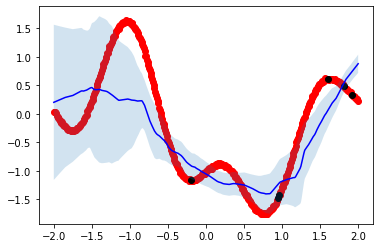

 95%|█████████▌| 190000/200000 [20:14<01:02, 160.76it/s]

Mean loss at epoch 190000 : -0.1563909500837326
 Validation loss after 190000 equals 0.9055559501051903


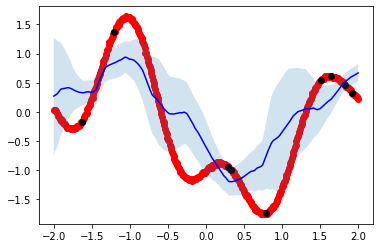

 97%|█████████▋| 194993/200000 [20:46<00:31, 157.60it/s]

Mean loss at epoch 195000 : 0.005132503341883421
 Validation loss after 195000 equals 0.8216652870178223


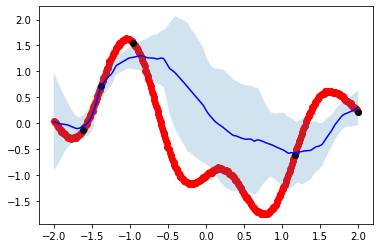

100%|██████████| 200000/200000 [21:18<00:00, 156.39it/s]


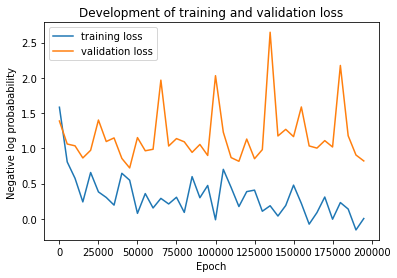

In [8]:
model_weights = trainer.run_training(trainloader, valiloader, plotting=True)